# Import Depedencies

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import time
import math
import numpy as np

# Dependecines for CSV
import csv
import os

# for rotation matrix
from scipy.spatial.transform import Rotation as R

# Import CSV files

In [2]:
rows = ['Frame','t1_pitch','t1_yaw','t1_roll']
with open('coords_yaw.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(rows)

# The Implementation

In [3]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
frame = 1

cap = cv2.VideoCapture('v1_yaw.mp4')

while cap.isOpened():
    success, image = cap.read()

    start = time.time()

    # Flip the image horizontally for a later selfie-view display
    # Also convert the color space from BGR to RGB
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

    # To improve performance
    image.flags.writeable = False
    
    # Get the result
    results = face_mesh.process(image)
    
    # To improve performance
    image.flags.writeable = True
    
    # Convert the color space from RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    img_h, img_w, img_c = image.shape
    face_3d = []
    face_2d = []

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for idx, lm in enumerate(face_landmarks.landmark):
                if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199 or idx==127 or idx == 356 or idx ==10 or idx==151:
                    if idx == 1:
                        nose_2d = (lm.x * img_w, lm.y * img_h)
                        nose_3d = (lm.x * img_w, lm.y * img_h, lm.z * 3000)

                    x, y = int(lm.x * img_w), int(lm.y * img_h)

                    # Get the 2D Coordinates
                    face_2d.append([x, y])

                    # Get the 3D Coordinates
                    face_3d.append([x, y, lm.z])       
            
            # Convert it to the NumPy array
            face_2d = np.array(face_2d, dtype=np.float64)

            # Convert it to the NumPy array
            face_3d = np.array(face_3d, dtype=np.float64)

            # The camera matrix
            focal_length = 1 * img_w

            cam_matrix = np.array([ [focal_length, 0, img_h / 2],
                                    [0, focal_length, img_w / 2],
                                    [0, 0, 1]])

            # The distortion parameters
            dist_matrix = np.zeros((4, 1), dtype=np.float64)

            # Solve PnP
            success, rot_vec, trans_vec = cv2.solvePnP(face_3d, face_2d, cam_matrix, dist_matrix)

            # Get rotational matrix
            rmat, jac = cv2.Rodrigues(rot_vec)
            
            
            r = R.from_matrix(rmat)
            #r = R.from_rotvec(np.transpose(rot_vec))
            
            angles = r.as_euler('zyx', degrees=True)
            angles = angles*1000
            print(angles)
                    
            


            # Add the text on the image
            #cv2.putText(image, text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)
            cv2.putText(image, "t1_p: " + str(angles[2]), (500, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            cv2.putText(image, "t1_y: " + str(angles[1]), (500, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            cv2.putText(image, "t1_r: " + str(angles[0]), (500, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
  
        
        
        
        end = time.time()
        totalTime = end - start

        row = [frame,angles[2],angles[1],angles[0]]
        with open('coords_yaw.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(row)

        mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=drawing_spec,
                    connection_drawing_spec=drawing_spec)


    cv2.imshow('Head Pose Estimation', image)
    frame = frame + 1
    if cv2.waitKey(5) & 0xFF == 27:
        break


cap.release()

[ 2.61270738 11.45830224 -2.8805978 ]
[ 2.51975555 11.07283408 -6.22313229]
[ 2.53587693 11.26347476 -6.36438477]
[ 2.44934731 10.17163986 -6.55584538]
[ 2.46766329 10.59277219 -6.25808293]
[ 2.53059017 11.13819458 -5.61859863]
[ 2.51278098 10.92874736 -5.71013082]
[ 2.47385573 10.71188651 -5.76196287]
[ 2.42471144 10.42103911 -6.93739936]
[ 2.47585334 10.34816694 -7.71182636]
[ 2.40404254  9.69416137 -7.91277923]
[ 2.35838295  9.37231558 -8.1194592 ]
[ 2.39058009  9.34571708 -8.28078823]
[ 2.36765312  9.02419611 -8.93885336]
[ 2.31328231  9.14663682 -7.80225891]
[ 2.31090248  8.59067612 -8.85926294]
[ 2.30979367  8.72160978 -8.77393057]
[ 2.33803462  9.55676836 -7.86995715]
[ 2.35466344  9.60270673 -8.3168879 ]
[ 2.33030501  9.04983096 -8.08380311]
[ 2.39056891  9.90536818 -8.17550791]
[ 2.49734745 10.50159098 -9.01554481]
[ 2.67306961 12.17936759 -8.51117571]
[ 2.88907624 14.88225594 -7.08242376]
[ 3.19703723 18.02386133 -6.85383622]
[ 3.50045557 20.9376752  -5.09340339]
[ 3.62297199

[ 3.52380647 21.44955224 -8.68039216]
[ 3.71844136 23.59808055 -6.996296  ]
[ 3.80773356 24.25104556 -6.65372825]
[ 3.79936909 24.46592552 -7.19597005]
[ 3.75092635 24.58457057 -6.36507919]
[ 3.74387958 24.04016789 -6.6252122 ]
[ 3.71869894 24.06084914 -6.29470586]
[ 3.6929529  23.81921334 -6.60771935]
[ 3.60487699 22.98031003 -6.60729754]
[ 3.50634868 22.40184048 -6.63687589]
[ 3.46375241 21.32404466 -7.04069837]
[ 3.39812858 20.45969592 -8.03996294]
[ 3.18974452 18.03778116 -9.4465567 ]
[  3.05104328  16.2989004  -10.04698382]
[ 2.80852507 13.47272732 -9.80369418]
[ 2.60481571 10.65547401 -9.33106109]
[ 2.23045613  7.21905906 -9.69744621]
[ 1.96526006  4.9713922  -9.98193777]
[  1.79207458   2.36278573 -11.6505267 ]
[  1.55845512   0.39402951 -11.13662916]
[  1.39631644  -1.48288875 -10.62748581]
[ 1.17744272 -4.37893178 -7.24842869]
[ 1.0754077  -6.22738901 -5.60433382]
[ 0.9000316  -8.10132282 -3.98311045]
[ 0.83957268 -8.49048411 -3.1266715 ]
[ 0.84637487 -8.53664362 -4.31054434]


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
print(rmat)

In [ ]:
print(np.transpose(rot_vec))

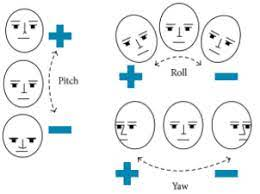

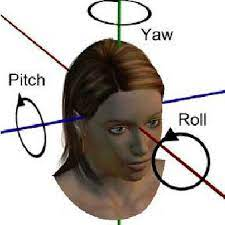

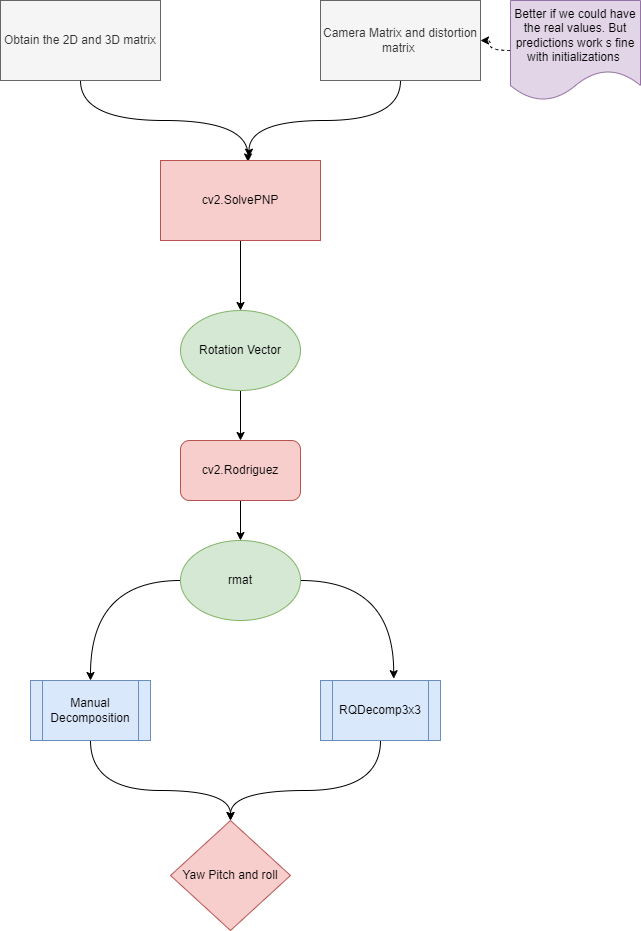


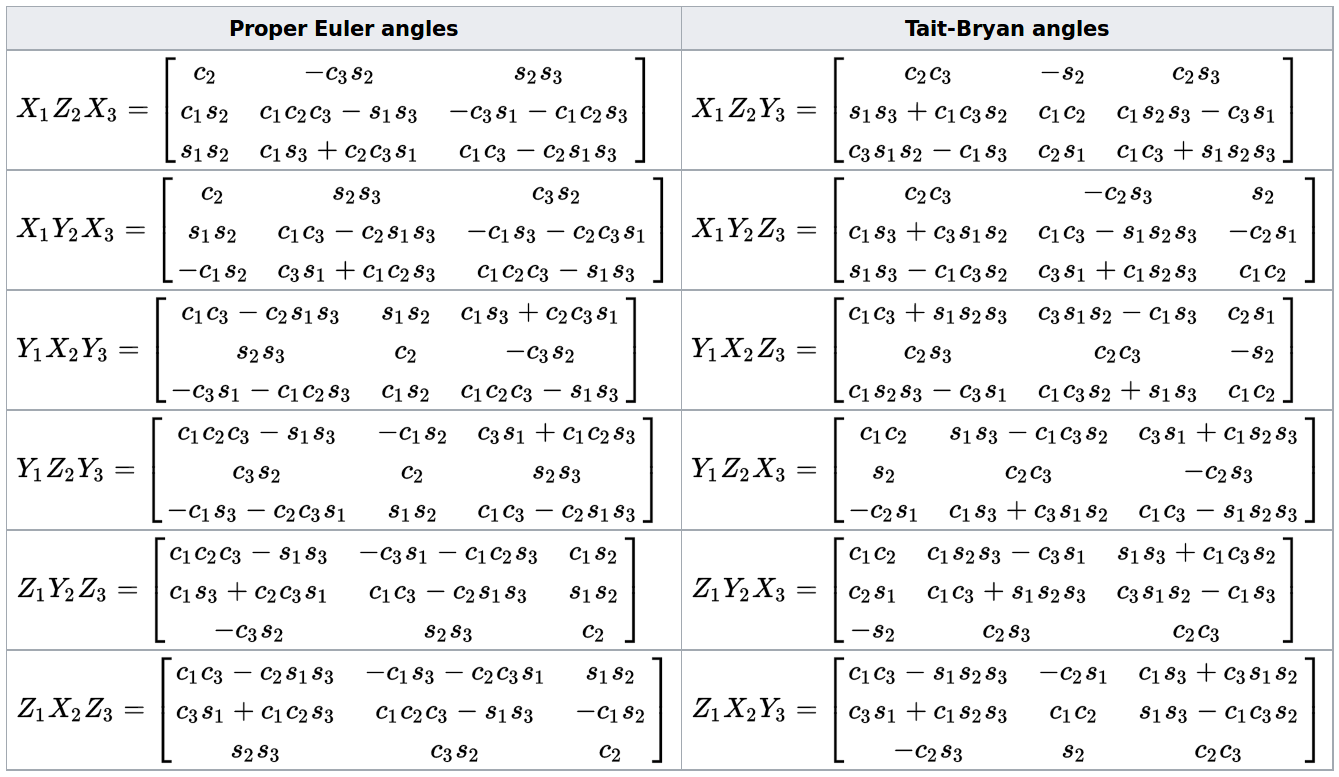


## Proper euler angles


https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/EulerProjections2.svg/300px-EulerProjections2.svg.png


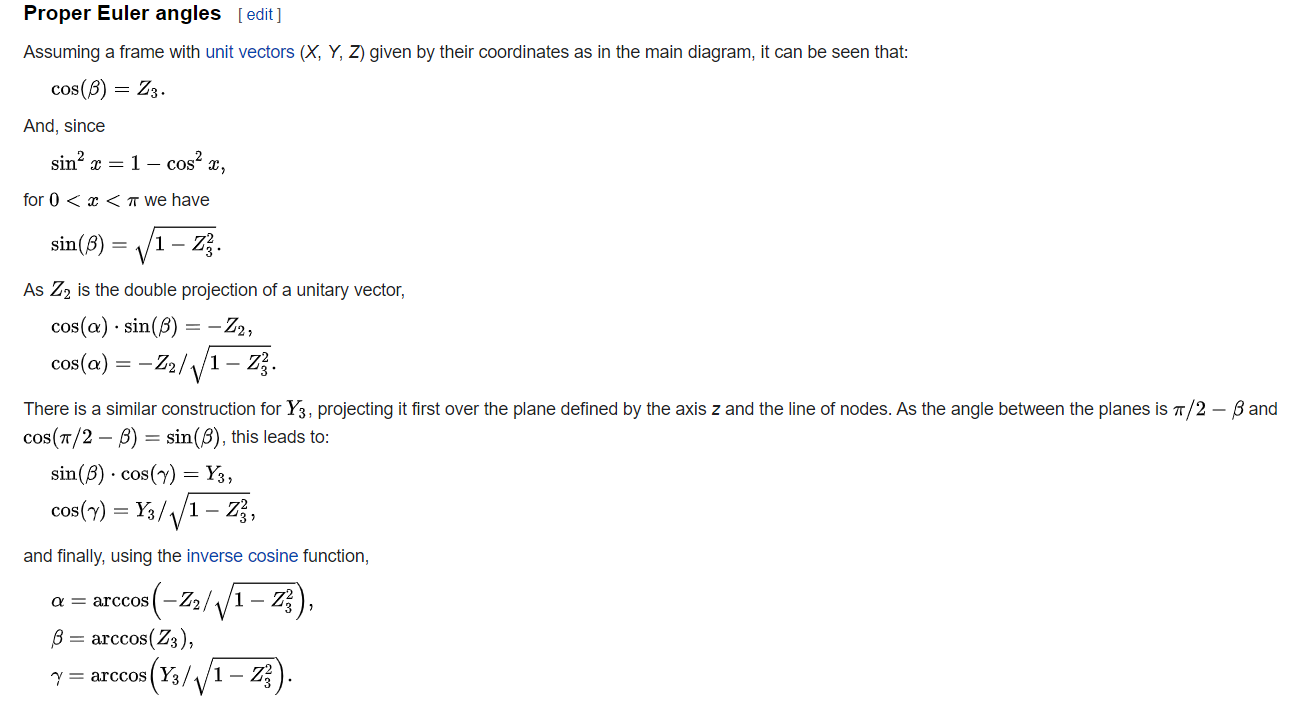

Proper Euler angles	Tait-Bryan angles
{\displaystyle X_{1}Z_{2}X_{3}}{\displaystyle X_{1}Z_{2}X_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{31}}{R_{21}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{11}^{2}}}{R_{11}}})\\\gamma &=\arctan({\frac {R_{13}}{-R_{12}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{31}}{R_{21}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{11}^{2}}}{R_{11}}})\\\gamma &=\arctan({\frac {R_{13}}{-R_{12}}})\end{aligned}}}	{\displaystyle X_{1}Z_{2}Y_{3}}{\displaystyle X_{1}Z_{2}Y_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{32}}{R_{22}}})\\\beta &=\arctan({\frac {-R_{12}}{\sqrt {1-R_{12}^{2}}}})\\\gamma &=\arctan({\frac {R_{13}}{R_{11}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{32}}{R_{22}}})\\\beta &=\arctan({\frac {-R_{12}}{\sqrt {1-R_{12}^{2}}}})\\\gamma &=\arctan({\frac {R_{13}}{R_{11}}})\end{aligned}}}
{\displaystyle X_{1}Y_{2}X_{3}}{\displaystyle X_{1}Y_{2}X_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{21}}{-R_{31}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{11}^{2}}}{R_{11}}})\\\gamma &=\arctan({\frac {R_{12}}{R_{13}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{21}}{-R_{31}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{11}^{2}}}{R_{11}}})\\\gamma &=\arctan({\frac {R_{12}}{R_{13}}})\end{aligned}}}	{\displaystyle X_{1}Y_{2}Z_{3}}{\displaystyle X_{1}Y_{2}Z_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {-R_{23}}{R_{33}}})\\\beta &=\arctan({\frac {R_{13}}{\sqrt {1-R_{13}^{2}}}})\\\gamma &=\arctan({\frac {-R_{12}}{R_{11}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {-R_{23}}{R_{33}}})\\\beta &=\arctan({\frac {R_{13}}{\sqrt {1-R_{13}^{2}}}})\\\gamma &=\arctan({\frac {-R_{12}}{R_{11}}})\end{aligned}}}
{\displaystyle Y_{1}X_{2}Y_{3}}{\displaystyle Y_{1}X_{2}Y_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{12}}{R_{32}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{22}^{2}}}{R_{22}}})\\\gamma &=\arctan({\frac {R_{21}}{-R_{23}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{12}}{R_{32}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{22}^{2}}}{R_{22}}})\\\gamma &=\arctan({\frac {R_{21}}{-R_{23}}})\end{aligned}}}	{\displaystyle Y_{1}X_{2}Z_{3}}{\displaystyle Y_{1}X_{2}Z_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{13}}{R_{33}}})\\\beta &=\arctan({\frac {-R_{23}}{\sqrt {1-R_{23}^{2}}}})\\\gamma &=\arctan({\frac {R_{21}}{R_{22}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{13}}{R_{33}}})\\\beta &=\arctan({\frac {-R_{23}}{\sqrt {1-R_{23}^{2}}}})\\\gamma &=\arctan({\frac {R_{21}}{R_{22}}})\end{aligned}}}
{\displaystyle Y_{1}Z_{2}Y_{3}}{\displaystyle Y_{1}Z_{2}Y_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{32}}{-R_{12}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{22}^{2}}}{R_{22}}})\\\gamma &=\arctan({\frac {R_{23}}{R_{21}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{32}}{-R_{12}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{22}^{2}}}{R_{22}}})\\\gamma &=\arctan({\frac {R_{23}}{R_{21}}})\end{aligned}}}	{\displaystyle Y_{1}Z_{2}X_{3}}{\displaystyle Y_{1}Z_{2}X_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {-R_{31}}{R_{11}}})\\\beta &=\arctan({\frac {R_{21}}{\sqrt {1-R_{21}^{2}}}})\\\gamma &=\arctan({\frac {-R_{23}}{R_{22}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {-R_{31}}{R_{11}}})\\\beta &=\arctan({\frac {R_{21}}{\sqrt {1-R_{21}^{2}}}})\\\gamma &=\arctan({\frac {-R_{23}}{R_{22}}})\end{aligned}}}
{\displaystyle Z_{1}Y_{2}Z_{3}}{\displaystyle Z_{1}Y_{2}Z_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{23}}{R_{13}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{33}^{2}}}{R_{33}}})\\\gamma &=\arctan({\frac {R_{32}}{-R_{31}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{23}}{R_{13}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{33}^{2}}}{R_{33}}})\\\gamma &=\arctan({\frac {R_{32}}{-R_{31}}})\end{aligned}}}	{\displaystyle Z_{1}Y_{2}X_{3}}{\displaystyle Z_{1}Y_{2}X_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{21}}{R_{11}}})\\\beta &=\arctan({\frac {-R_{31}}{\sqrt {1-R_{31}^{2}}}})\\\gamma &=\arctan({\frac {R_{32}}{R_{33}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{21}}{R_{11}}})\\\beta &=\arctan({\frac {-R_{31}}{\sqrt {1-R_{31}^{2}}}})\\\gamma &=\arctan({\frac {R_{32}}{R_{33}}})\end{aligned}}}
{\displaystyle Z_{1}X_{2}Z_{3}}Z_{1}X_{2}Z_{3}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{13}}{-R_{23}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{33}^{2}}}{R_{33}}})\\\gamma &=\arctan({\frac {R_{31}}{R_{32}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {R_{13}}{-R_{23}}})\\\beta &=\arctan({\frac {\sqrt {1-R_{33}^{2}}}{R_{33}}})\\\gamma &=\arctan({\frac {R_{31}}{R_{32}}})\end{aligned}}}	{\displaystyle Z_{1}X_{2}Y_{3}}{\displaystyle Z_{1}X_{2}Y_{3}}	{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {-R_{12}}{R_{22}}})\\\beta &=\arctan({\frac {R_{32}}{\sqrt {1-R_{32}^{2}}}})\\\gamma &=\arctan({\frac {-R_{31}}{R_{33}}})\end{aligned}}}{\displaystyle {\begin{aligned}\alpha &=\arctan({\frac {-R_{12}}{R_{22}}})\\\beta &=\arctan({\frac {R_{32}}{\sqrt {1-R_{32}^{2}}}})\\\gamma &=\arctan({\frac {-R_{31}}{R_{33}}})\end{aligned}}}

#include <opencv2/calib3d.hpp>

Converts a rotation matrix to a rotation vector or vice versa.

Parameters
src	Input rotation vector (3x1 or 1x3) or rotation matrix (3x3).
dst	Output rotation matrix (3x3) or rotation vector (3x1 or 1x3), respectively.
jacobian	Optional output Jacobian matrix, 3x9 or 9x3, which is a matrix of partial derivatives of the output array components with respect to the input array components.
θ←norm(r)r←r/θR=cos(θ)I+(1−cosθ)rrT+sin(θ)⎡⎣⎢0rz−ry−rz0rxry−rx0⎤⎦⎥
Inverse transformation can be also done easily, since

sin(θ)⎡⎣⎢0rz−ry−rz0rxry−rx0⎤⎦⎥=R−RT2
A rotation vector is a convenient and most compact representation of a rotation matrix (since any rotation matrix has just 3 degrees of freedom). The representation is used in the global 3D geometry optimization procedures like calibrateCamera, stereoCalibrate, or solvePnP .

Note
More information about the computation of the derivative of a 3D rotation matrix with respect to its exponential coordinate can be found in:
A Compact Formula for the Derivative of a 3-D Rotation in Exponential Coordinates, Guillermo Gallego, Anthony J. Yezzi [80]
Useful information on SE(3) and Lie Groups can be found in:
A tutorial on SE(3) transformation parameterizations and on-manifold optimization, Jose-Luis Blanco [23]
Lie Groups for 2D and 3D Transformation, Ethan Eade [62]
A micro Lie theory for state estimation in robotics, Joan Solà, Jérémie Deray, Dinesh Atchuthan [196]